# Import libaries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
sns.set_style('darkgrid')

# Data loading

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Dados/unified-data/full_table_05022023.csv')

In [4]:
df['variavel'].unique()

array(['Efetivo dos rebanhos', 'Quantidade produzida',
       'Quantidade produzida na silvicultura', 'Área de cobertura'],
      dtype=object)

# Declaração de funções (Não alterar)

In [17]:
def plot_tipo_producao(df, tipo_producao_1, tipo_producao_2, variavel_1, variavel_2):

    df_wide = pd.pivot_table(df, columns = 'variavel', values = 'valor',aggfunc=np.sum,
                        index = ['produto','ano', 'tipo_producao'], fill_value = 0)
    df_wide = df_wide.reset_index()

    df_plot = df_wide.loc[(df_wide['tipo_producao'] == tipo_producao_1) | (df_wide['tipo_producao'] == tipo_producao_2) & (df_wide['ano'] >= 1985)].groupby('ano', as_index=False).sum()
    df_plot = df_plot.loc[(df_plot['ano'] >= 1985)]

    ax = sns.lineplot(x = df_plot['ano'], y = df_plot[variavel_1], color='g')

    ax1 = ax.twinx()
    ax2 = sns.lineplot(x = df_plot['ano'], y = df_plot[variavel_2], color ='b')

    ax2.grid(False)
    ax.ticklabel_format(style='plain', axis='y')
    ax2.ticklabel_format(style='plain', axis='y')
    ax.legend(handles=[Line2D([], [], marker='_', color="g", label='Cabeças'), Line2D([], [], marker='_', color="b", label='Hectares')])

    ax.set_xticks(list(range(1984,2022,1)))
    ax2.set_xticks(list(range(1984,2022,1)))

    plt.xlim((1984, 2022))

    plt.ylim(bottom=0)



    plt.title('Número de cabeças e cobertura de pastagem no decorres dos anos para o estado do Pará', fontdict= {'size':13}, 
            y = 1.03, fontweight="bold")

    ax.set_xticklabels(
        labels=list(range(1984,2022,1)), rotation=70)
    ax2.set_xticklabels(
        labels=list(range(1984,2022,1)), rotation=70)

    ax.set_ylabel('Número de cabeças', fontweight="bold")
    ax2.set_ylabel('Cobertura de pastagem', fontweight="bold")

    ax.yaxis.label.set_color('green')
    ax2.yaxis.label.set_color('blue')

    ax.tick_params(colors='green', axis='y') 
    ax2.tick_params(colors='blue', axis='y') 

    plt.show()

In [5]:
def filtrar_tabela(df, filtrar_por, area, filtros:dict, limitar_ano=True):
# 	cod_municipality	regiao_intermediaria	cod_regiao_intermediaria	cod_regiao_imediata	regiao_imediata	tipo_producao	cod_variavel	variavel	produto	valor	ano

  '''
  # Filtro de tabela
  ```
  filtrar_tabela(data, filtrar_por, area, filtros:dict, limitar_ano=True)
  ```

  Filtra a tabela de dados full_table.csv



  Parâmetros: df: DataFrame
                  
                  Objeto DataFrame localizado em:  /content/drive/MyDrive/Dados/unified-data/*.csv
              
              filtrar_por: str
                  
                  Aplica filtro para limitar a dimensão geográfica dos dados filtrados. Aceita 3 valores:

                    Pará: Filtro em todo o estado
                    imediata: Utiliza dimenssão de região imediata
                    intermediaria: Utiliza dimnessão de região intermediária
                    municipio: Utiliza dimenssão de município

              area: str ou list

                  Área que o filtro será aplicado. Deve coincidir com os registros presentes no DataFrame. Caso o parâmetro *filtrar_por* seja especificado como "municipio", as área devem estar presentes na dimenssão do município
              
              filtros: dict

                  Aplica diversos filtros com base em um dicionário Python. As chaves passadas devem corresponder a uma coluna e o valor deve corresponder ao filtro de igualdade aplicado.

                  Exemplo:
                    
                    Para retornar somente os registros com o tipo_de_produção "Pecuária" do produto de bovinos, o dicionário deve ser o seguinte:

                    ````
                    {"tipo_producao":"Pecuária", "produto":"Bovino"}
                    ````

              limitar_ano: Boleano

                  Filtra os registros considerando o ano maior ou igual a 1985. Se False, irá considerar também os anos anteriores\n\n\n

  

  Retorna: pandas.DataFrame
  '''



  if limitar_ano:
    df = df.loc[df['ano'] >= 1985]

  if filtrar_por == 'Pará':
    df_temp = df

  elif filtrar_por == 'imediata':
    if type(area) == list:
      df_regi = []
      for i in area:
        df_area.append(df.loc[df['regiao_imediata'] == i])
      df_temp = pd.concat(df_area)
    elif type(area) == str:
      df_temp = df.loc[df['regiao_imediata'] == area]
    
  elif filtrar_por == 'intermediaria':
    if type(area) == list:
      df_area = []
      for i in area:
        df_area.append(df.loc[df['regiao_intermediaria'] == i])
      df_temp = pd.concat(df_area)
    elif type(area) == str:
      df_temp = df.loc[df['regiao_intermediaria'] == area]


  elif filtrar_por == 'municipio':
    if type(area) == list:
      df_area = []
      for i in area:
        df_area.append(df.loc[df['municipio'] == i])
      df_temp = pd.concat(df_area)
    elif type(area) == str:
      df_temp = df.loc[df['municipio'] == area]

  list_df_plot = []

  for k, v in filtros.items():
    list_df_plot.append(df_temp.loc[df_temp[k] == v])
  df_temp = pd.concat(list_df_plot)
  df_temp = df_temp.drop_duplicates()
  return df_temp.reset_index(drop = True)
  
def visulizar_opcoes(df, coluna):
  for i in df[coluna].unique():
    print(f'{i}')

# Sandbox

In [6]:
visulizar_opcoes(df, 'tipo_producao')

Pecuária
Produto das lavouras temporárias
Produto das lavouras permanentes
Silvicultura
Área de cobertura de Floresta
Pastagem


In [7]:
df_test = filtrar_tabela(df, 'municipio', 'Paragominas', filtros = {'tipo_producao':'Pecuária', 'produto':'Bovino'})
df_test

,municipio,cod_municipality,regiao_intermediaria,cod_regiao_intermediaria,cod_regiao_imediata,regiao_imediata,tipo_producao,cod_variavel,variavel,cod_produto,produto,cod_metrica,metrica,valor,ano
0,Paragominas,1505502,Paragominas,150007,1502,Castanhal,Pecuária,105.0,Efetivo dos rebanhos,2670.0,Bovino,24.0,Cabeças,385641.0,1985.0
1,Paragominas,1505502,Paragominas,150007,1502,Castanhal,Pecuária,105.0,Efetivo dos rebanhos,2670.0,Bovino,24.0,Cabeças,449860.0,1986.0
2,Paragominas,1505502,Paragominas,150007,1502,Castanhal,Pecuária,105.0,Efetivo dos rebanhos,2670.0,Bovino,24.0,Cabeças,469380.0,1987.0
3,Paragominas,1505502,Paragominas,150007,1502,Castanhal,Pecuária,105.0,Efetivo dos rebanhos,2670.0,Bovino,24.0,Cabeças,505000.0,1988.0
4,Paragominas,1505502,Paragominas,150007,1502,Castanhal,Pecuária,105.0,Efetivo dos rebanhos,2670.0,Bovino,24.0,Cabeças,513145.0,1989.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,Paragominas,1505502,Paragominas,150007,1502,Castanhal,Pecuária,105.0,Efetivo dos rebanhos,-1.0,Ovino,1.0,Hectares,6722.0,2017.0
366,Paragominas,1505502,Paragominas,150007,1502,Castanhal,Pecuária,105.0,Efetivo dos rebanhos,-1.0,Ovino,1.0,Hectares,5380.0,2018.0
367,Paragominas,1505502,Paragominas,150007,1502,Castanhal,Pecuária,105.0,Efetivo dos rebanhos,-1.0,Ovino,1.0,Hectares,5373.0,2019.0
368,Paragominas,1505502,Paragominas,150007,1502,Castanhal,Pecuária,105.0,Efetivo dos rebanhos,-1.0,Ovino,1.0,Hectares,2277.0,2020.0


Text(0, 0.5, 'Qtd')

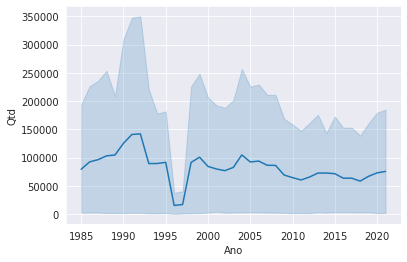

In [8]:
ax = sns.lineplot(x =  df_test['ano'], y = df_test['valor'])
ax.set_xlabel('Ano')
ax.set_ylabel('Qtd')

# ax.set_title(f'Quantidade de {metrica} de {produto} produzidas\n na(s) cidade(s) de {cidade} dos anos de {int(df_test.ano.min())} até {int(df_test.ano.max())}')

In [9]:
# Tirar cidade n/ pará
# Coluna produto/cobertura - Dados mapbiomas, Métrica hectares
# Adiciona MapBiomas
# Ajuste de gráficos
# Filtrar diversas dimensionalidades geográficas
# Incluir estatística descritivas de acordo com dados geográficos

# Workspace (15/02/2023)

In [10]:
df.head()

,municipio,cod_municipality,regiao_intermediaria,cod_regiao_intermediaria,cod_regiao_imediata,regiao_imediata,tipo_producao,cod_variavel,variavel,cod_produto,produto,cod_metrica,metrica,valor,ano
0,Abaetetuba,1500107,Abaetetuba,150003,1501,Belém,Pecuária,105.0,Efetivo dos rebanhos,2670.0,Bovino,24.0,Cabeças,28.0,1974.0
1,Abaetetuba,1500107,Abaetetuba,150003,1501,Belém,Pecuária,105.0,Efetivo dos rebanhos,2670.0,Bovino,24.0,Cabeças,54.0,1975.0
2,Abaetetuba,1500107,Abaetetuba,150003,1501,Belém,Pecuária,105.0,Efetivo dos rebanhos,2670.0,Bovino,24.0,Cabeças,47.0,1976.0
3,Abaetetuba,1500107,Abaetetuba,150003,1501,Belém,Pecuária,105.0,Efetivo dos rebanhos,2670.0,Bovino,24.0,Cabeças,39.0,1977.0
4,Abaetetuba,1500107,Abaetetuba,150003,1501,Belém,Pecuária,105.0,Efetivo dos rebanhos,2670.0,Bovino,24.0,Cabeças,10.0,1978.0


In [11]:
df.produto.unique()

array(['Bovino', 'Bubalino', 'Equino', 'Caprino', 'Ovino', 'Abacaxi*',
       'Amendoim (em casca)', 'Arroz (em casca)', 'Batata-doce',
       'Cana-de-açúcar', 'Cebola', 'Feijão (em grão)', 'Fumo (em folha)',
       'Malva (fibra)', 'Melancia', 'Milho (em grão)', 'Soja (em grão)',
       'Sorgo (em grão)', 'Tomate', 'Açaí', 'Banana (cacho)',
       'Borracha (látex coagulado)', 'Cacau (em amêndoa)',
       'Café (em grão) Total', 'Café (em grão) Arábica',
       'Castanha de caju', 'Coco-da-baía*', 'Goiaba', 'Laranja', 'Limão',
       'Mamão', 'Maracujá', 'Palmito', 'Pimenta-do-reino', 'Tangerina',
       'Urucum (semente)', '1.1.1 - Carvão vegetal de eucalipto',
       '1.2.1 - Lenha de eucalipto',
       '1.3.1.1 - Madeira em tora de eucalipto para papel e celulose',
       '1.3.2.1 - Madeira em tora de eucalipto para outras finalidades',
       '1.3.2.3 - Madeira em tora de outras espécies para outras finalidades',
       'Carvão vegetal de eucalipto', 'Lenha de eucalipto',
       

In [86]:
to_replace = {'1.1.1 - Carvão vegetal de eucalipto':'Carvão vegetal de eucalipto',
              '1.2.1 - Lenha de eucalipto':'Lenha de eucalipto',
              '1.3.1.1 - Madeira em tora de eucalipto para papel e celulose':'Madeira em tora de eucalipto para papel e celulose',
              '1.3.2.1 - Madeira em tora de eucalipto para outras finalidades':'Madeira em tora de eucalipto para outras finalidades',
              '1.3.2.3 - Madeira em tora de outras espécies para outras finalidades':'Madeira em tora de eucalipto para outras finalidades'}
df['produto'] = df.produto.replace(to_replace)
df


,municipio,cod_municipality,regiao_intermediaria,cod_regiao_intermediaria,cod_regiao_imediata,regiao_imediata,tipo_producao,cod_variavel,variavel,produto,valor,ano
0,Abaetetuba,1500107,Abaetetuba,150003,1501,Belém,Pecuária,105.0,Efetivo dos rebanhos,Bovino,28.000000,1974.0
1,Abaetetuba,1500107,Abaetetuba,150003,1501,Belém,Pecuária,105.0,Efetivo dos rebanhos,Bovino,54.000000,1975.0
2,Abaetetuba,1500107,Abaetetuba,150003,1501,Belém,Pecuária,105.0,Efetivo dos rebanhos,Bovino,47.000000,1976.0
3,Abaetetuba,1500107,Abaetetuba,150003,1501,Belém,Pecuária,105.0,Efetivo dos rebanhos,Bovino,39.000000,1977.0
4,Abaetetuba,1500107,Abaetetuba,150003,1501,Belém,Pecuária,105.0,Efetivo dos rebanhos,Bovino,10.000000,1978.0
...,...,...,...,...,...,...,...,...,...,...,...,...
731530,Vitória do Xingu,1508357,Altamira,1506,150018,Altamira,Produto das lavouras temporárias,41.0,Área de cobertura,Outros,366.334757,2021.0
731531,Xinguara,1508407,Redenção,1504,150014,Xinguara,Área de cobertura de Floresta,3.0,Área de cobertura,Florest,67297.304704,2021.0
731532,Xinguara,1508407,Redenção,1504,150014,Xinguara,Pastagem,15.0,Área de cobertura,Pasto,300973.161862,2021.0
731533,Xinguara,1508407,Redenção,1504,150014,Xinguara,Produto das lavouras temporárias,39.0,Área de cobertura,Soja (em grão),1232.578321,2021.0


In [13]:
df.produto.unique()

array(['Bovino', 'Bubalino', 'Equino', 'Caprino', 'Ovino', 'Abacaxi*',
       'Amendoim (em casca)', 'Arroz (em casca)', 'Batata-doce',
       'Cana-de-açúcar', 'Cebola', 'Feijão (em grão)', 'Fumo (em folha)',
       'Malva (fibra)', 'Melancia', 'Milho (em grão)', 'Soja (em grão)',
       'Sorgo (em grão)', 'Tomate', 'Açaí', 'Banana (cacho)',
       'Borracha (látex coagulado)', 'Cacau (em amêndoa)',
       'Café (em grão) Total', 'Café (em grão) Arábica',
       'Castanha de caju', 'Coco-da-baía*', 'Goiaba', 'Laranja', 'Limão',
       'Mamão', 'Maracujá', 'Palmito', 'Pimenta-do-reino', 'Tangerina',
       'Urucum (semente)', 'Carvão vegetal de eucalipto',
       'Lenha de eucalipto',
       'Madeira em tora de eucalipto para papel e celulose',
       'Madeira em tora de eucalipto para outras finalidades',
       'Madeira em tora de outras espécies para outras finalidades',
       'Florest', 'Pasto', 'Outros'], dtype=object)

In [15]:
df_wide = pd.pivot_table(df, columns = 'variavel', values = 'valor',aggfunc=np.sum,
                        index = ['produto','ano', 'tipo_producao', 'metrica'], fill_value = 0)
df_wide = df_wide.reset_index()
df_wide 

variavel,produto,ano,tipo_producao,metrica,Efetivo dos rebanhos,Quantidade produzida,Quantidade produzida na silvicultura,Área de cobertura
0,Abacaxi*,1974.0,Produto das lavouras temporárias,Hectares,0,888,0,0.0
1,Abacaxi*,1974.0,Produto das lavouras temporárias,Toneladas,0,888,0,0.0
2,Abacaxi*,1975.0,Produto das lavouras temporárias,Hectares,0,1146,0,0.0
3,Abacaxi*,1975.0,Produto das lavouras temporárias,Toneladas,0,1146,0,0.0
4,Abacaxi*,1976.0,Produto das lavouras temporárias,Hectares,0,988,0,0.0
...,...,...,...,...,...,...,...,...
3815,Urucum (semente),2019.0,Produto das lavouras permanentes,Toneladas,0,1105,0,0.0
3816,Urucum (semente),2020.0,Produto das lavouras permanentes,Hectares,0,990,0,0.0
3817,Urucum (semente),2020.0,Produto das lavouras permanentes,Toneladas,0,990,0,0.0
3818,Urucum (semente),2021.0,Produto das lavouras permanentes,Hectares,0,940,0,0.0


In [16]:
df.to_csv('/content/drive/MyDrive/Dados/unified-data/full_table_17022023.csv', index=False)

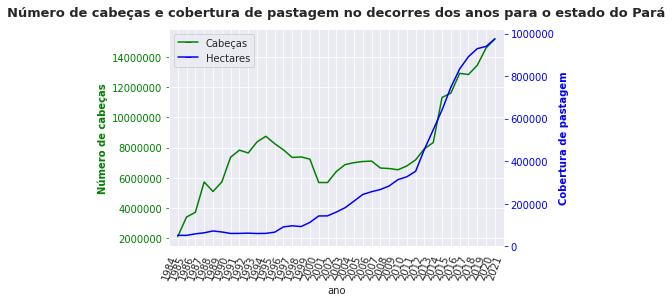

In [20]:
plot_tipo_producao(df, 'Produto das lavouras temporárias', 'Produto das lavouras permanentes',
                    'Quantidade produzida', 'Área de cobertura')

In [21]:
df.variavel.unique()

array(['Efetivo dos rebanhos', 'Quantidade produzida',
       'Quantidade produzida na silvicultura', 'Área de cobertura'],
      dtype=object)

In [ ]:
df_plot = df_wide.loc[(df_wide['tipo_producao'] == 'Pecuária') | (df_wide['tipo_producao'] == 'Pastagem') & (df_wide['ano'] >= 1985)].groupby('ano', as_index=False).sum()
df_plot = df_plot.loc[(df_plot['ano'] >= 1985)]
df_plot

In [30]:
sns.set(rc={'figure.figsize':(10,6)})

## Pastagem e pecuária

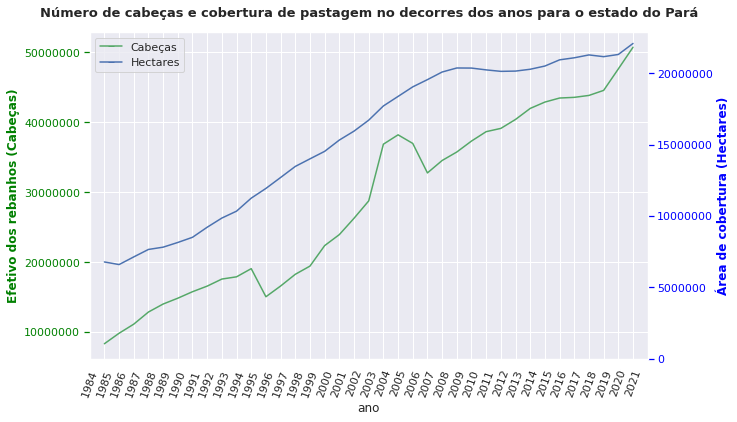

In [31]:
ax = sns.lineplot(x = df_plot['ano'], y = df_plot['Efetivo dos rebanhos'], color='g')

ax1 = ax.twinx()
ax2 = sns.lineplot(x = df_plot['ano'], y = df_plot['Área de cobertura'], color ='b')

ax2.grid(False)
ax.ticklabel_format(style='plain', axis='y')
ax2.ticklabel_format(style='plain', axis='y')
ax.legend(handles=[Line2D([], [], marker='_', color="g", label='Cabeças'), Line2D([], [], marker='_', color="b", label='Hectares')])

ax.set_xticks(list(range(1984,2022,1)))
ax2.set_xticks(list(range(1984,2022,1)))

plt.xlim((1984, 2022))

plt.ylim(bottom=0)



plt.title('Número de cabeças e cobertura de pastagem no decorres dos anos para o estado do Pará', fontdict= {'size':13}, 
          y = 1.03, fontweight="bold")

ax.set_xticklabels(
    labels=list(range(1984,2022,1)), rotation=70)
ax2.set_xticklabels(
    labels=list(range(1984,2022,1)), rotation=70)

ax.set_ylabel('Efetivo dos rebanhos (Cabeças)', fontweight="bold")
ax2.set_ylabel('Área de cobertura (Hectares)', fontweight="bold")

ax.yaxis.label.set_color('green')
ax2.yaxis.label.set_color('blue')

ax.tick_params(colors='green', axis='y') 
ax2.tick_params(colors='blue', axis='y') 

plt.show()

Text(0.5, 2, 'Correlação de Pearson entre o número de\n rebanho e a cobertura de pastagens no estado do Pará')

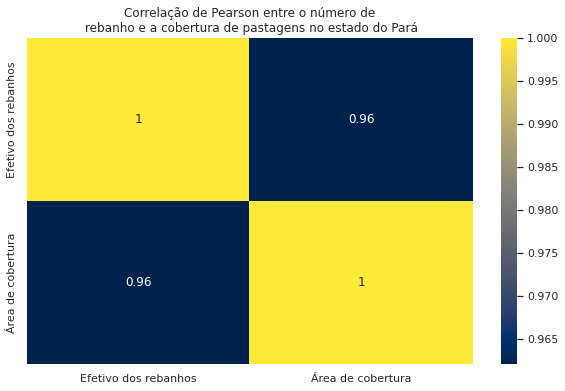

In [139]:
sns.heatmap(df_plot[['Efetivo dos rebanhos', 'Área de cobertura']].corr(),annot=True, cmap='cividis')
plt.xlabel('')
plt.ylabel('')
plt.title('Correlação de Pearson entre o número de\n rebanho e a cobertura de pastagens no estado do Pará',
          y = 2)

In [34]:
visulizar_opcoes(df, coluna = 'tipo_producao')

Pecuária
Produto das lavouras temporárias
Produto das lavouras permanentes
Silvicultura
Área de cobertura de Floresta
Pastagem


In [35]:
visulizar_opcoes(df, coluna = 'produto')

Bovino
Bubalino
Equino
Caprino
Ovino
Abacaxi*
Amendoim (em casca)
Arroz (em casca)
Batata-doce
Cana-de-açúcar
Cebola
Feijão (em grão)
Fumo (em folha)
Malva (fibra)
Melancia
Milho (em grão)
Soja (em grão)
Sorgo (em grão)
Tomate
Açaí
Banana (cacho)
Borracha (látex coagulado)
Cacau (em amêndoa)
Café (em grão) Total
Café (em grão) Arábica
Castanha de caju
Coco-da-baía*
Goiaba
Laranja
Limão
Mamão
Maracujá
Palmito
Pimenta-do-reino
Tangerina
Urucum (semente)
Carvão vegetal de eucalipto
Lenha de eucalipto
Madeira em tora de eucalipto para papel e celulose
Madeira em tora de eucalipto para outras finalidades
Madeira em tora de outras espécies para outras finalidades
Florest
Pasto
Outros


In [36]:
df_soja = df.loc[df['produto'] == 'Soja (em grão)']

In [37]:
df_soja

,municipio,cod_municipality,regiao_intermediaria,cod_regiao_intermediaria,cod_regiao_imediata,regiao_imediata,tipo_producao,cod_variavel,variavel,cod_produto,produto,cod_metrica,metrica,valor,ano
768,Abaetetuba,1500107,Abaetetuba,150003,1501,Belém,Produto das lavouras temporárias,214.0,Quantidade produzida,2713.0,Soja (em grão),1017.0,Toneladas,0.000000,1974.0
769,Abaetetuba,1500107,Abaetetuba,150003,1501,Belém,Produto das lavouras temporárias,214.0,Quantidade produzida,2713.0,Soja (em grão),1017.0,Toneladas,0.000000,1975.0
770,Abaetetuba,1500107,Abaetetuba,150003,1501,Belém,Produto das lavouras temporárias,214.0,Quantidade produzida,2713.0,Soja (em grão),1017.0,Toneladas,0.000000,1976.0
771,Abaetetuba,1500107,Abaetetuba,150003,1501,Belém,Produto das lavouras temporárias,214.0,Quantidade produzida,2713.0,Soja (em grão),1017.0,Toneladas,0.000000,1977.0
772,Abaetetuba,1500107,Abaetetuba,150003,1501,Belém,Produto das lavouras temporárias,214.0,Quantidade produzida,2713.0,Soja (em grão),1017.0,Toneladas,0.000000,1978.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525624,Uruará,1508159,Altamira,1506,150018,Altamira,Produto das lavouras temporárias,39.0,Área de cobertura,-1.0,Soja (em grão),1.0,Hectares,4051.138800,2021.0
525628,Vigia,1508209,Belém,1501,150001,Belém,Produto das lavouras temporárias,39.0,Área de cobertura,-1.0,Soja (em grão),1.0,Hectares,4.290440,2021.0
525633,Viseu,1508308,Castanhal,1502,150005,Bragança,Produto das lavouras temporárias,39.0,Área de cobertura,-1.0,Soja (em grão),1.0,Hectares,63.458213,2021.0
525637,Vitória do Xingu,1508357,Altamira,1506,150018,Altamira,Produto das lavouras temporárias,39.0,Área de cobertura,-1.0,Soja (em grão),1.0,Hectares,21.607314,2021.0


In [42]:
def plot_tipo_producao(df, tipo_producao_1, tipo_producao_2, variavel_1, variavel_2 , titulo, y1_label, y2_label, y1_legend, y2_legend, return_df):

    df_wide = pd.pivot_table(df, columns = 'variavel', values = 'valor',aggfunc=np.sum,
                        index = ['produto','ano', 'tipo_producao'], fill_value = 0)
    df_wide = df_wide.reset_index()

    df_plot = df_wide.loc[(df_wide['tipo_producao'] == tipo_producao_1) | (df_wide['tipo_producao'] == tipo_producao_2) & (df_wide['ano'] >= 1985)].groupby('ano', as_index=False).sum()
    df_plot = df_plot.loc[(df_plot['ano'] >= 1985)]

    if return_df == True:
        return df_plot

    ax = sns.lineplot(x = df_plot['ano'], y = df_plot[variavel_1], color='g')

    ax1 = ax.twinx()
    ax2 = sns.lineplot(x = df_plot['ano'], y = df_plot[variavel_2], color ='b')

    ax2.grid(False)
    ax.ticklabel_format(style='plain', axis='y')
    ax2.ticklabel_format(style='plain', axis='y')
    ax.legend(handles=[Line2D([], [], marker='_', color="g", label=y1_legend), Line2D([], [], marker='_', color="b", label=y2_legend)])

    ax.set_xticks(list(range(1984,2022,1)))
    ax2.set_xticks(list(range(1984,2022,1)))

    plt.xlim((1984, 2022))

    plt.ylim(bottom=0)



    plt.title(titulo, fontdict= {'size':13}, 
            y = 1.03, fontweight="bold")

    ax.set_xticklabels(
        labels=list(range(1984,2022,1)), rotation=70)
    ax2.set_xticklabels(
        labels=list(range(1984,2022,1)), rotation=70)

    ax.set_ylabel(y1_label, fontweight="bold")
    ax2.set_ylabel(y2_label, fontweight="bold")

    ax.yaxis.label.set_color('green')
    ax2.yaxis.label.set_color('blue')

    ax.tick_params(colors='green', axis='y') 
    ax2.tick_params(colors='blue', axis='y') 

    plt.show()

In [135]:
df_soja = df.loc[df['produto'] == 'Soja (em grão)']
df_soja

,municipio,cod_municipality,regiao_intermediaria,cod_regiao_intermediaria,cod_regiao_imediata,regiao_imediata,tipo_producao,cod_variavel,variavel,produto,metrica,valor,ano
768,Abaetetuba,1500107,Abaetetuba,150003,1501,Belém,Produto das lavouras temporárias,214.0,Quantidade produzida,Soja (em grão),Toneladas,0.000000,1974.0
769,Abaetetuba,1500107,Abaetetuba,150003,1501,Belém,Produto das lavouras temporárias,214.0,Quantidade produzida,Soja (em grão),Toneladas,0.000000,1975.0
770,Abaetetuba,1500107,Abaetetuba,150003,1501,Belém,Produto das lavouras temporárias,214.0,Quantidade produzida,Soja (em grão),Toneladas,0.000000,1976.0
771,Abaetetuba,1500107,Abaetetuba,150003,1501,Belém,Produto das lavouras temporárias,214.0,Quantidade produzida,Soja (em grão),Toneladas,0.000000,1977.0
772,Abaetetuba,1500107,Abaetetuba,150003,1501,Belém,Produto das lavouras temporárias,214.0,Quantidade produzida,Soja (em grão),Toneladas,0.000000,1978.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
275960,Uruará,1508159,Altamira,1506,150018,Altamira,Produto das lavouras temporárias,39.0,Área de cobertura,Soja (em grão),Hectares,4051.138800,2021.0
275964,Vigia,1508209,Belém,1501,150001,Belém,Produto das lavouras temporárias,39.0,Área de cobertura,Soja (em grão),Hectares,4.290440,2021.0
275970,Viseu,1508308,Castanhal,1502,150005,Bragança,Produto das lavouras temporárias,39.0,Área de cobertura,Soja (em grão),Hectares,63.458213,2021.0
275974,Vitória do Xingu,1508357,Altamira,1506,150018,Altamira,Produto das lavouras temporárias,39.0,Área de cobertura,Soja (em grão),Hectares,21.607314,2021.0


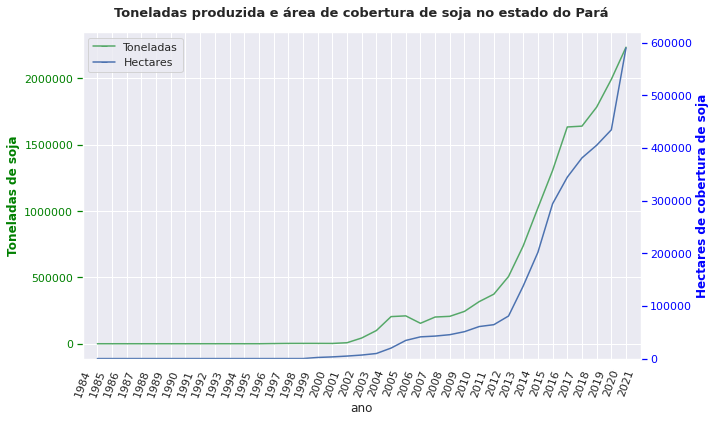

In [125]:
plot_tipo_producao(df_soja, 'Produto das lavouras temporárias', 'Produto das lavouras temporárias',
                    'Quantidade produzida', 'Área de cobertura', titulo = 'Toneladas produzida e área de cobertura de soja no estado do Pará',
                   y1_label='Toneladas de soja', y2_label='Hectares de cobertura de soja',
                   y1_legend='Toneladas', y2_legend='Hectares',return_df= False)

Text(0.5, 2, 'Correlação de Pearson a quantidade produzida de soja e área\n de cobertura de soja no estado do Pará')

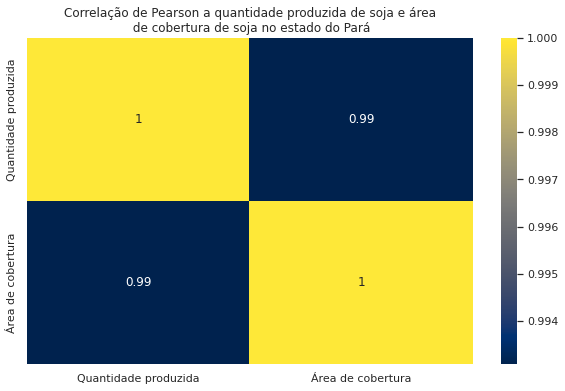

In [126]:
df_corr_soja = plot_tipo_producao(df_soja, 'Produto das lavouras temporárias', 'Produto das lavouras temporárias',
                    'Quantidade produzida', 'Área de cobertura', titulo = 'Toneladas produzida e área de cobertura de soja no estado do Pará',
                    y1_label='Toneladas de soja', y2_label='Hectares de cobertura de soja',
                    y1_legend='Toneladas', y2_legend='Hectares',return_df= True)


sns.heatmap(df_corr_soja[['Quantidade produzida', 'Área de cobertura']].corr(),annot=True, cmap='cividis')
plt.xlabel('')
plt.ylabel('')
plt.title('Correlação de Pearson a quantidade produzida de soja e área\n de cobertura de soja no estado do Pará',
          y = 2)

## Silvicultura

In [102]:
df = pd.read_csv('/content/drive/MyDrive/Dados/unified-data/full_table_05022023.csv')
df.sample(15)

,municipio,cod_municipality,regiao_intermediaria,cod_regiao_intermediaria,cod_regiao_imediata,regiao_imediata,tipo_producao,cod_variavel,variavel,produto,metrica,valor,ano
213723,São João de Pirabas,1507474,Capanema,150006,1502,Castanhal,Produto das lavouras permanentes,214.0,Quantidade produzida,Tangerina,Toneladas,0.000000,2019.0
43159,Brasil Novo,1501725,Altamira,150018,1506,Altamira,Produto das lavouras permanentes,214.0,Quantidade produzida,Maracujá,Toneladas,120.000000,1993.0
79247,Dom Eliseu,1502939,Paragominas,150007,1502,Castanhal,Produto das lavouras permanentes,214.0,Quantidade produzida,Café (em grão) Arábica,Toneladas,0.000000,1994.0
271709,Castanhal,1502400,Castanhal,1502,150004,Castanhal,Produto das lavouras permanentes,48.0,Área de cobertura,Outros,Hectares,954.803856,2016.0
273160,Cachoeira do Piriá,1501956,Castanhal,1502,150005,Bragança,Área de cobertura de Floresta,3.0,Área de cobertura,Florest,Hectares,137438.943163,2018.0
90704,Igarapé-Açu,1503200,Castanhal,150004,1502,Castanhal,Produto das lavouras temporárias,214.0,Quantidade produzida,Cana-de-açúcar,Toneladas,0.000000,1985.0
70995,Cumaru do Norte,1502764,Redenção,150012,1504,Redenção,Produto das lavouras permanentes,214.0,Quantidade produzida,Pimenta-do-reino,Toneladas,0.000000,1995.0
21833,Aurora do Pará,1500958,Paragominas,150007,1502,Castanhal,Produto das lavouras permanentes,214.0,Quantidade produzida,Banana (cacho),Toneladas,0.000000,1976.0
258621,Peixe-Boi,1505601,Castanhal,1502,150006,Capanema,Produto das lavouras permanentes,48.0,Área de cobertura,Outros,Hectares,62.119500,1998.0
181689,Salinópolis,1506203,Capanema,150006,1502,Castanhal,Produto das lavouras permanentes,214.0,Quantidade produzida,Cacau (em amêndoa),Toneladas,0.000000,1995.0


In [114]:
df.loc[(df['tipo_producao'] == 'Silvicultura')].metrica.unique()

array(['Toneladas', 'Metros cúbicos', 'Hectares'], dtype=object)

### Toneladas

In [104]:
df_silvicultura_ton = df.loc[(df['metrica'] == 'Hectares') | (df['metrica'] == 'Toneladas')]

In [105]:
df_silvicultura_ton

,municipio,cod_municipality,regiao_intermediaria,cod_regiao_intermediaria,cod_regiao_imediata,regiao_imediata,tipo_producao,cod_variavel,variavel,produto,metrica,valor,ano
240,Abaetetuba,1500107,Abaetetuba,150003,1501,Belém,Produto das lavouras temporárias,214.0,Quantidade produzida,Abacaxi*,Toneladas,0.000000,1974.0
241,Abaetetuba,1500107,Abaetetuba,150003,1501,Belém,Produto das lavouras temporárias,214.0,Quantidade produzida,Abacaxi*,Toneladas,0.000000,1975.0
242,Abaetetuba,1500107,Abaetetuba,150003,1501,Belém,Produto das lavouras temporárias,214.0,Quantidade produzida,Abacaxi*,Toneladas,6.000000,1976.0
243,Abaetetuba,1500107,Abaetetuba,150003,1501,Belém,Produto das lavouras temporárias,214.0,Quantidade produzida,Abacaxi*,Toneladas,3.000000,1977.0
244,Abaetetuba,1500107,Abaetetuba,150003,1501,Belém,Produto das lavouras temporárias,214.0,Quantidade produzida,Abacaxi*,Toneladas,16.000000,1978.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
275975,Vitória do Xingu,1508357,Altamira,1506,150018,Altamira,Produto das lavouras temporárias,41.0,Área de cobertura,Outros,Hectares,366.334757,2021.0
275976,Xinguara,1508407,Redenção,1504,150014,Xinguara,Área de cobertura de Floresta,3.0,Área de cobertura,Florest,Hectares,67297.304704,2021.0
275977,Xinguara,1508407,Redenção,1504,150014,Xinguara,Pastagem,15.0,Área de cobertura,Pasto,Hectares,300973.161862,2021.0
275978,Xinguara,1508407,Redenção,1504,150014,Xinguara,Produto das lavouras temporárias,39.0,Área de cobertura,Soja (em grão),Hectares,1232.578321,2021.0


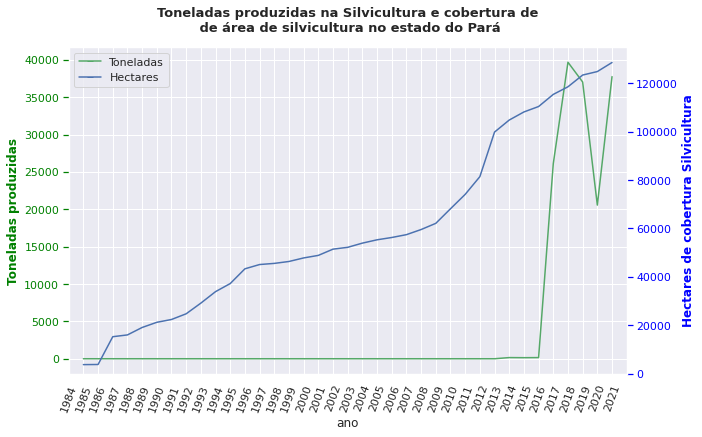

In [111]:
plot_tipo_producao(df_silvicultura_ton, 'Silvicultura', 'Silvicultura',
                    'Quantidade produzida na silvicultura', 'Área de cobertura', titulo = 'Toneladas produzidas na Silvicultura e cobertura de\n de área de silvicultura no estado do Pará',
                    y1_label='Toneladas produzidas', y2_label='Hectares de cobertura Silvicultura',
                    y1_legend='Toneladas', y2_legend='Hectares',return_df= False)

Text(0.5, 2, 'Correlação de Pearson entre toneladas produzidas na Silvicultura\n e cobertura de de área de silvicultura no estado do Pará')

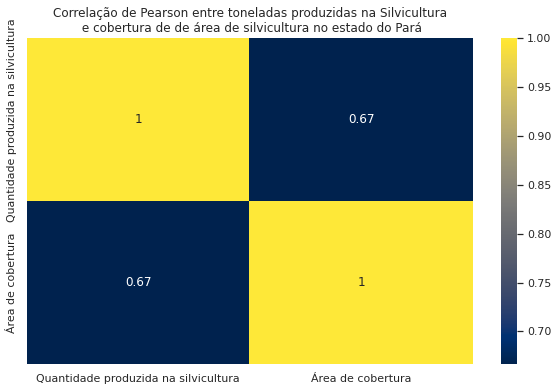

In [113]:
df_corr_silvicultura_ton = plot_tipo_producao(df_silvicultura_ton, 'Silvicultura', 'Silvicultura',
                    'Quantidade produzida na silvicultura', 'Área de cobertura', titulo = 'Toneladas produzidas na Silvicultura e cobertura de\n de área de silviculta no estado do Pará',
                    y1_label='Toneladas produzidas', y2_label='Hectares de cobertura Silvicultura',
                    y1_legend='Toneladas', y2_legend='Hectares',return_df= True)


sns.heatmap(df_corr_soja[['Quantidade produzida na silvicultura', 'Área de cobertura']].corr(),annot=True, cmap='cividis')
plt.xlabel('')
plt.ylabel('')
plt.title('Correlação de Pearson entre toneladas produzidas na Silvicultura\n e cobertura de de área de silvicultura no estado do Pará',
          y = 2)

### Metros cúbicos

In [116]:
df_silvicultura_m3 = df.loc[(df['metrica'] == 'Hectares') | (df['metrica'] == 'Metros cúbicos')]

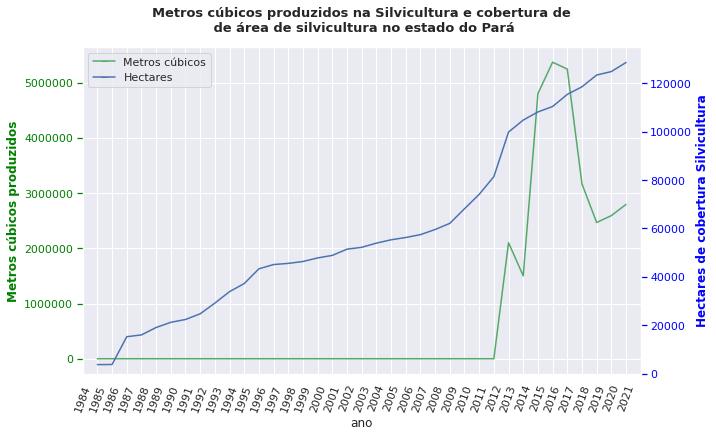

In [119]:
plot_tipo_producao(df_silvicultura_m3, 'Silvicultura', 'Silvicultura',
                    'Quantidade produzida na silvicultura', 'Área de cobertura', titulo = 'Metros cúbicos produzidos na Silvicultura e cobertura de\n de área de silvicultura no estado do Pará',
                    y1_label='Metros cúbicos produzidos', y2_label='Hectares de cobertura Silvicultura',
                    y1_legend='Metros cúbicos', y2_legend='Hectares',return_df= False)

Text(0.5, 2, 'Correlação de Pearson entre Metros cúbicos produzidos na Silvicultura\n e cobertura de de área de silvicultura no estado do Pará')

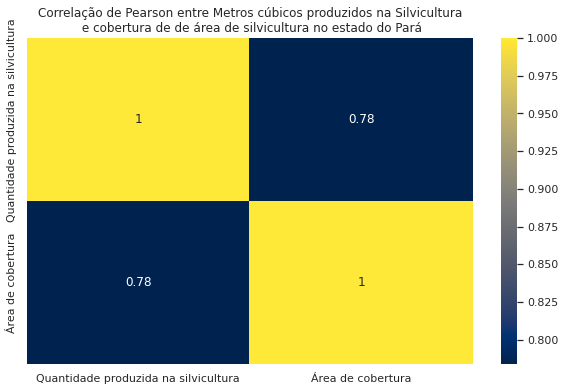

In [121]:
df_corr_silvicultura_m3 = plot_tipo_producao(df_silvicultura_m3, 'Silvicultura', 'Silvicultura',
                    'Quantidade produzida na silvicultura', 'Área de cobertura', titulo = 'Metros cúbicos produzidos na Silvicultura e cobertura de\n de área de silvicultura no estado do Pará',
                    y1_label='Metros cúbicos produzidos', y2_label='Hectares de cobertura Silvicultura',
                    y1_legend='Metros cúbicos', y2_legend='Hectares',return_df= True)


sns.heatmap(df_corr_soja[['Quantidade produzida na silvicultura', 'Área de cobertura']].corr(),annot=True, cmap='cividis')
plt.xlabel('')
plt.ylabel('')
plt.title('Correlação de Pearson entre Metros cúbicos produzidos na Silvicultura\n e cobertura de de área de silvicultura no estado do Pará',
          y = 2)

## Lavouras permanentes

In [128]:
df_lavouras_perm = df.loc[df['produto'] != 'Soja (em grão)']

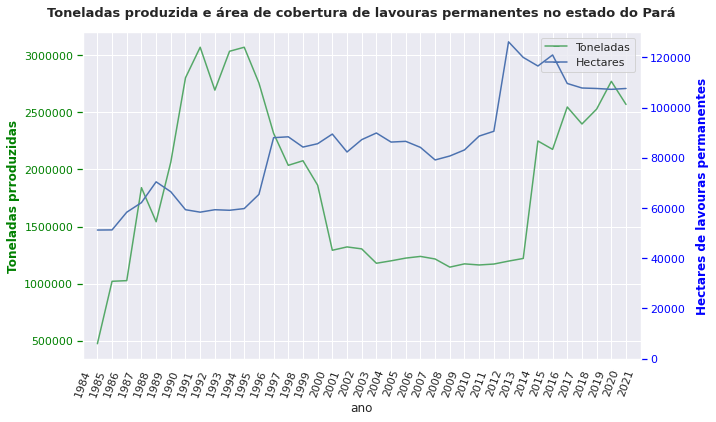

In [134]:
plot_tipo_producao(df_lavouras_perm, 'Produto das lavouras permanentes', 'Produto das lavouras permanentes',
                    'Quantidade produzida', 'Área de cobertura', titulo = 'Toneladas produzida e área de cobertura de lavouras permanentes no estado do Pará',
                    y1_label='Toneladas prroduzidas', y2_label='Hectares de lavouras permanentes',
                    y1_legend='Toneladas', y2_legend='Hectares',return_df= False)

Text(0.5, 2, 'Correlação de Pearson a quantidade produzida de lavouras permanentes e área\n de cobertura de lavouras permanentes no estado do Pará')

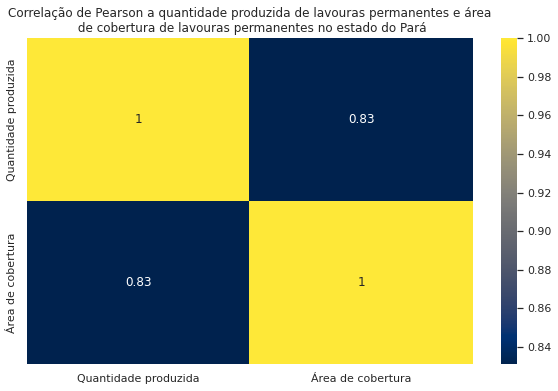

In [133]:
df_corr_soja = plot_tipo_producao(df_lavouras_perm, 'Produto das lavouras temporárias', 'Produto das lavouras temporárias',
                    'Quantidade produzida', 'Área de cobertura', titulo = 'Toneladas produzida e área de cobertura de lavouras permanentes no estado do Pará',
                    y1_label='Toneladas prroduzidas', y2_label='Hectares de lavouras permanentes',
                    y1_legend='Toneladas', y2_legend='Hectares',return_df= True)


sns.heatmap(df_corr_soja[['Quantidade produzida', 'Área de cobertura']].corr(),annot=True, cmap='cividis')
plt.xlabel('')
plt.ylabel('')
plt.title('Correlação de Pearson a quantidade produzida de lavouras permanentes e área\n de cobertura de lavouras permanentes no estado do Pará',
          y = 2)

## Lavouras temporárias

In [137]:
df_lavouras_temp = df.loc[df['produto'] != 'Soja (em grão)']

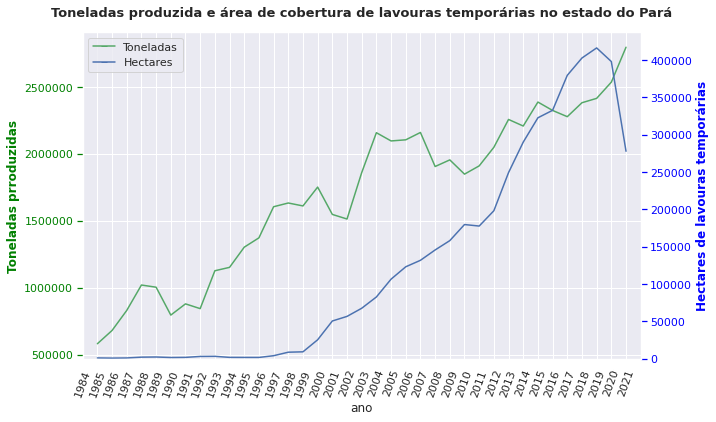

In [138]:
plot_tipo_producao(df_lavouras_temp, 'Produto das lavouras temporárias', 'Produto das lavouras temporárias',
                    'Quantidade produzida', 'Área de cobertura', titulo = 'Toneladas produzida e área de cobertura de lavouras temporárias no estado do Pará',
                    y1_label='Toneladas prroduzidas', y2_label='Hectares de lavouras temporárias',
                    y1_legend='Toneladas', y2_legend='Hectares',return_df= False)

In [ ]:
df_corr_soja = plot_tipo_producao(df_lavouras_perm, 'Produto das lavouras temporárias', 'Produto das lavouras temporárias',
                    'Quantidade produzida', 'Área de cobertura', titulo = 'Toneladas produzida e área de cobertura de lavouras permanentes no estado do Pará',
                    y1_label='Toneladas prroduzidas', y2_label='Hectares de lavouras permanentes',
                    y1_legend='Toneladas', y2_legend='Hectares',return_df= True)


sns.heatmap(df_corr_soja[['Quantidade produzida', 'Área de cobertura']].corr(),annot=True, cmap='cividis')
plt.xlabel('')
plt.ylabel('')
plt.title('Correlação de Pearson a quantidade produzida de lavouras permanentes e área\n de cobertura de lavouras permanentes no estado do Pará',
          y = 2)